## Web Crawling
- 웹 페이지에서 데이터를 수집하는 방법에 대해서 학습

### 웹크롤링 방법

#### 웹페이지의 종류
- 정적인 페이지 : 웹 브라우져에 화면이 한번 뜨면 이벤트에 의한 화면의 변경이 없는 페이지 
- 동적인 페이지 : 웹 브라우져에 화면이 뜨고 이벤트가 발생하면 서버에서 데이터를 가져와 화면을 변경하는 페이지

#### requests 이용
- 받아오는 문자열에 따라 두가지 방법으로 구분
    - json 문자열로 받아서 파싱하는 방법 : 주로 동적 페이지 크롤링할때 사용 
    - html 문자열로 받아서 파싱하는 방법 : 주로 정적 페이지 크롤링할때 사용
        
#### selenium 이용
- 브라우져를 직접 열어서 데이터를 받는 방법

#### 크롤링 방법에 따른 속도
- requests json > requests html > selenium

### Crawling Naver Stock Datas
- 네이버 증권 사이트에서 주가 데이터 수집
- 수집할 데이터 : 일별 kospi, kosdaq 주가, 일별 환율(exchange rate) 데이터
- 데이터 수집 절차
    - 웹서비스 분석 : url
    - 서버에 데이터 요청 : request(url) > response : json(str)
    - 서버에서 받은 데이터 파싱(데이터 형태를 변경) : json(str) > list, dict > DataFrame

In [1]:
import requests 
import pandas as pd

#### 1. 웹서비스 분석 : url
- pc 웹페이지가 복잡하면 mobile 웹페이지에서 수집

In [59]:
# url ='https://m.stock.naver.com/api/index/KOSPI/price?pageSize=10&page=5'
page_size, page = 60, 1
url = f'https://m.stock.naver.com/api/index/KOSPI/price?pageSize={page_size}&page={page}'
url

'https://m.stock.naver.com/api/index/KOSPI/price?pageSize=60&page=1'

#### 2. 서버에 데이터 요청 : request(url) > response : json(str)
- response의 status code가 200이 나오는지 확인
- 403이나 500이 나오면 request가 잘못되거나 web server에서 수집이 안되도록 설정이 된것임
    - header 설정 또는 selenium 사용
- 200이 나오더라도 response 안에 있는 내용을 확인 > 확인하는 방법 : response.text

In [62]:
response = requests.get(url)
response

<Response [200]>

In [64]:
# response.text

In [10]:
type(response)

requests.models.Response

In [12]:
dir(response)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [14]:
type(response.text), response.text[:100]

(str,
 '[{"localTradedAt":"2024-07-19","closePrice":"2,795.46","compareToPreviousClosePrice":"-28.89","compa')

#### 3. 서버에서 받은 데이터 파싱(데이터 형태를 변경) : json(str) > list, dict > DataFrame

In [66]:
data = response.json()
type(data), data[:2]

(list,
 [{'localTradedAt': '2024-09-19',
   'closePrice': '2,580.80',
   'compareToPreviousClosePrice': '5.39',
   'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
   'fluctuationsRatio': '0.21',
   'openPrice': '2,594.67',
   'highPrice': '2,598.68',
   'lowPrice': '2,550.09'},
  {'localTradedAt': '2024-09-13',
   'closePrice': '2,575.41',
   'compareToPreviousClosePrice': '3.32',
   'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
   'fluctuationsRatio': '0.13',
   'openPrice': '2,571.81',
   'highPrice': '2,584.11',
   'lowPrice': '2,562.91'}])

In [68]:
df = pd.DataFrame(data)
df = df[['localTradedAt', 'closePrice']]
df.tail(2)

,localTradedAt,closePrice
58,2024-06-25,"2,774.39"
59,2024-06-24,"2,764.73"


#### 4. 함수로 만들기

In [71]:
def stock_price(page=1, page_size=60):
    url = f'https://m.stock.naver.com/api/index/KOSPI/price?pageSize={page_size}&page={page}'
    response = requests.get(url)
    data = response.json()
    return pd.DataFrame(data)[['localTradedAt', 'closePrice']]

In [73]:
stock_price(page=3, page_size=5)

,localTradedAt,closePrice
0,2024-09-02,"2,681.00"
1,2024-08-30,"2,674.31"
2,2024-08-29,"2,662.28"
3,2024-08-28,"2,689.83"
4,2024-08-27,"2,689.25"


#### 5. 원달러 환율 데이터 수집 : 실습

In [ ]:
# 코스닥 데이터 수집
# 원달러 환율 데이터 수집

In [77]:
# 코스닥 데이터 수집해보기 - 실습
def stock_price(code='KOSPI', page=1, page_size=60):
    url = f'https://m.stock.naver.com/api/index/{code}/price?pageSize={page_size}&page={page}'
    response = requests.get(url)
    data = response.json()
    return pd.DataFrame(data)[['localTradedAt', 'closePrice']]
# https://m.stock.naver.com/api/index/KOSDAQ/price?pageSize=10&page=2

In [79]:
stock_price(code='KOSDAQ', page=3, page_size=5)

,localTradedAt,closePrice
0,2024-09-03,760.37
1,2024-09-02,769.21
2,2024-08-30,767.66
3,2024-08-29,756.04
4,2024-08-28,762.50


In [97]:
# 원달러 환율 데이터 수집 - 실습
page_size, page = 60, 1
url = f'https://m.stock.naver.com/front-api/marketIndex/prices?category=exchange&reutersCode=FX_USDKRW&page={page}&pageSize={page_size}'

# request(URL) > response(JSON)
response = requests.get(url)

# JSON > list, dict > DataFrame
data = response.json()['result']
df = pd.DataFrame(data)[['localTradedAt', 'closePrice']]
df.tail(2)

,localTradedAt,closePrice
58,2024-06-26,"1,394.50"
59,2024-06-25,"1,392.00"


In [105]:
def exchange_rate(code='FX_USDKRW', page=1, page_size=60):
    url = f'https://m.stock.naver.com/front-api/marketIndex/prices?category=exchange&reutersCode={code}&page={page}&pageSize={page_size}'
    response = requests.get(url)
    data = response.json()['result']
    return pd.DataFrame(data)[['localTradedAt', 'closePrice']]

In [107]:
exchange_rate(page_size=10).tail(2)

,localTradedAt,closePrice
8,2024-09-05,"1,335.00"
9,2024-09-04,"1,336.50"


#### 6. 시각화

In [120]:
# 데이터 수집 
page_size = 30
kp_df = stock_price('KOSPI', page_size=page_size)
kd_df = stock_price('KOSDAQ', page_size=page_size)
usd_df = exchange_rate(page_size=page_size)

# 데이터 전처리
kp_df['closePrice'] = kp_df['closePrice'].apply(lambda data: float(data.replace(',', '')))
kd_df['closePrice'] = kd_df['closePrice'].apply(lambda data: float(data.replace(',', '')))
usd_df['closePrice'] = usd_df['closePrice'].apply(lambda data: float(data.replace(',', '')))

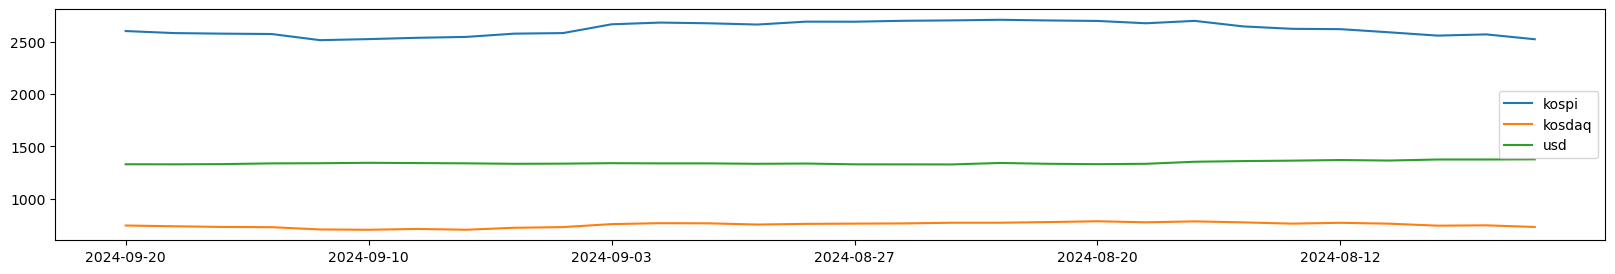

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 3))
plt.plot(kp_df['localTradedAt'], kp_df['closePrice'], label='kospi')
plt.plot(kd_df['localTradedAt'], kd_df['closePrice'], label='kosdaq')
plt.plot(usd_df['localTradedAt'], usd_df['closePrice'], label='usd')
plt.legend()
plt.xticks(kp_df['localTradedAt'][::5])
plt.show()

#### 7. 데이터 스케일링
- min max scaling


- $z = \frac{x_i - min(x)}{max(x) - min(x)} (0 \leqq z \leqq 1)$


- latex syntax : `https://jjycjnmath.tistory.com/117`

In [135]:
from sklearn.preprocessing import minmax_scale

minmax_scale(kp_df['closePrice'])

array([0.44704066, 0.34704066, 0.31930005, 0.30221307, 0.        ,
       0.0517756 , 0.11610911, 0.15908389, 0.31976325, 0.34704066,
       0.77848688, 0.86273803, 0.82830674, 0.76639218, 0.90818322,
       0.90519815, 0.95028307, 0.96922285, 1.        , 0.96634071,
       0.94318065, 0.82856408, 0.94626866, 0.6748842 , 0.55651055,
       0.54004117, 0.38630983, 0.22316006, 0.28327329, 0.04518785])

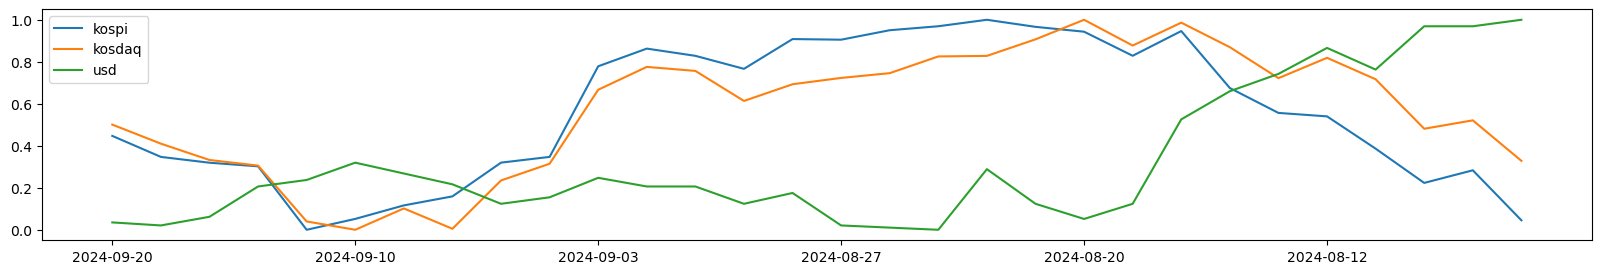

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 3))
plt.plot(kp_df['localTradedAt'], minmax_scale(kp_df['closePrice']), label='kospi')
plt.plot(kd_df['localTradedAt'], minmax_scale(kd_df['closePrice']), label='kosdaq')
plt.plot(usd_df['localTradedAt'], minmax_scale(usd_df['closePrice']), label='usd')
plt.legend()
plt.xticks(kp_df['localTradedAt'][::5])
plt.show()

#### 8. 상관관계 분석
- 피어슨 상관계수(Pearson Correlation Coefficient)
- 두 데이터 집합의 상관도를 분석할때 사용되는 지표
- 상관계수의 해석
    - -1에 가까울수록 서로 반대방향으로 움직임
    - 1에 가까울수록 서로 같은방향으로 움직임
    - 0에 가까울수록 두 데이터는 관계가 없음

In [143]:
# 데이터 전처리 : merge
merge_df = pd.merge(kp_df, kd_df, on='localTradedAt')
merge_df = pd.merge(merge_df, usd_df, on='localTradedAt')
merge_df.columns = ['date', 'kospi', 'kosdaq', 'usd']
merge_df.tail(2)

,date,kospi,kosdaq,usd
28,2024-08-07,2568.41,748.54,1376.0
29,2024-08-06,2522.15,732.87,1377.5


In [147]:
merge_df.iloc[:, 1:].corr()

,kospi,kosdaq,usd
kospi,1.000000,0.881503,-0.356499
kosdaq,0.881503,1.000000,0.029633
usd,-0.356499,0.029633,1.000000


In [ ]:
# 원달러환율이 높으면 달러를 원화로 환전하여 코스피 지수를 구매
# 원달러환율이 낮으면 코스피 지수를 판매하여 달러로 환전